# 2 Numerical Algebra

## 2.1 Intro to Numerical Root Finding

The golden rule of numerical analysis: We compute only when everything else fails.

In this chapter we want to solve equations using a computer. The goal of equation solving is to find the value of the independent variable which makes the equation true. These are the sorts of equations that you learned to solve in high school algebra and Pre-Calculus. For a very simple example, solve for $ x $ if $ x + 5 = 2x - 3 $. Or for another example, the equation $ x^2 + x = 2x - 7 $ is an equation that could be solved with the quadratic formula. As another example, the equation $ \sin(x) = \frac{\sqrt{2}}{2} $ is an equation which can be solved using some knowledge of trigonometry. The topic of Numerical Root Finding really boils down to approximating the solutions to equations without using all of the by-hand techniques that you learned in high school. The downside to everything that we’re about to do is that our answers are only ever going to be approximations. To see a video introduction to this chapter go to [this link](https://youtu.be/W2yL9IVmv2A).

The fact that we will only ever get approximate answers begs the question: why would we want to do numerical algebra if by-hand techniques exist? The answers are relatively simple:

1. By-hand algebra is often very challenging, quite time-consuming, and error-prone. You will find that the numerical techniques are quite elegant, work very quickly, and require very little overhead to actually implement and verify.
2. Most equations do not lend themselves to by-hand solutions. The techniques that we know from high school algebra solve common, and often quite simplified, problems but when equations arise naturally they are often not nice.

Let’s first take a look at equations in a more abstract way. Consider the equation  
$\ell(x) = r(x)$ where $\ell(x)$ and $r(x)$ stand for left-hand and right-hand expressions respectively. To begin solving this equation we can first rewrite it by subtracting the right-hand side from the left to get  
$$\ell(x) − r(x) = 0.$$

Hence, we can define a function $f(x)$ as $f(x) = \ell(x) − r(x)$ and observe that *every* equation can be written as:  
$$\text{If } f(x) = 0, \text{find } x.$$

This gives us a common language for which to frame all of our numerical algorithms.

For example, if we want to solve the equation  
$$3 \sin(x) + 9 = x^2 − \cos(x)$$ 
then this is the same as solving  
$$(3 \sin(x) + 9) − (x^2 − \cos(x)) = 0.$$ 
We illustrate this idea in Figure 2.1. You should pause and notice that there is no way that you are going to apply by-hand techniques from algebra to solve this equation … an approximate answer is pretty much our only hope.

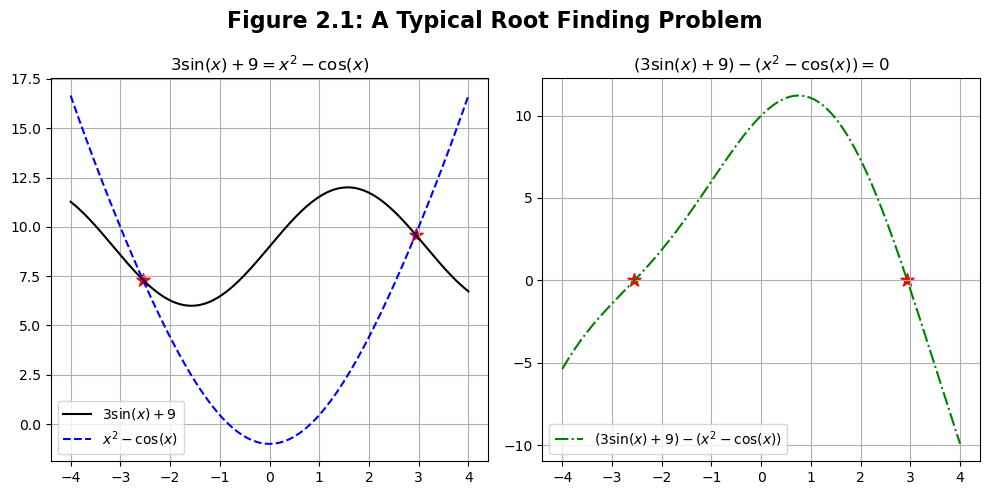

In [3]:
# Figure 2.1: A Typical Root Finding Problem

# you can ignore this code - just run it and look at the figure below

import numpy as np
import matplotlib.pyplot as plt

# Define the function and equation components
x = np.linspace(-4, 4, 400)
f1 = 3 * np.sin(x) + 9
f2 = x**2 - np.cos(x)
diff = f1 - f2

# Find the intersection points numerically
from scipy.optimize import fsolve

def equation(x):
    return 3 * np.sin(x) + 9 - (x**2 - np.cos(x))

# Initial guesses for solutions
x_intersections = fsolve(equation, [-2, 3])
y_intersections = 3 * np.sin(x_intersections) + 9

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: Functions
axs[0].plot(x, f1, 'k', label=r'$3\sin(x)+9$')
axs[0].plot(x, f2, 'b--', label=r'$x^2 - \cos(x)$')
axs[0].scatter(x_intersections, y_intersections, color='red', s=100, marker='*')  # Mark intersections
axs[0].set_title(r'$3\sin(x)+9 = x^2 - \cos(x)$')
axs[0].legend()
axs[0].grid(True)

# Right plot: Difference function
axs[1].plot(x, diff, 'g-.', label=r'$(3\sin(x)+9)-(x^2-\cos(x))$')
axs[1].scatter(x_intersections, np.zeros_like(x_intersections), color='red', s=100, marker='*')  # Mark zeros
axs[1].set_title(r'$(3\sin(x)+9)-(x^2-\cos(x))=0$')
axs[1].legend()
axs[1].grid(True)

fig.suptitle("Figure 2.1: A Typical Root Finding Problem", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()


On the left-hand side of Figure 2.1 we see the solutions to the equation $3\sin(x) + 9 = x^2 - \cos(x)$, and on the right-hand side we see the solutions to the equation

$$
(3\sin(x) + 9) - (x^2 - \cos(x)) = 0.
$$

From the plots it is apparent that the two equations have the same solutions: $x_1 \approx -2.55$ and $x_2 \approx 2.88$. Figure 2.1 should demonstrate what we mean when we say that solving equations of the form $\ell(x) = r(x)$ will give the same answer as solving $f(x) = 0$. Pause for a moment and closely examine the plots to verify this for yourself.

We now have one way to view every equation-solving problem. As we’ll see in this chapter, if $f(x)$ has certain properties then different numerical techniques for solving the equation will apply – and some will be much faster and more accurate than others. The following sections give several different techniques for solving equations of the form $f(x) = 0$. We will start with the simplest techniques to implement and then move to the more powerful techniques that require some ideas from Calculus to understand and analyze. Throughout this chapter we will also work to quantify the amount of error that we make while using these techniques.


## The Bisection Method

---

## 2.2.1 Intuition and Implementation

### Exercise 2.1  
A friend tells you that she is thinking of a number between 1 and 100. She will allow you multiple guesses with some feedback for where the mystery number falls. How do you systematically go about guessing the mystery number? Is there an optimal strategy?

For example, the conversation might go like this:

**Sally:** I’m thinking of a number between 1 and 100  
**Joe:** Is it 35?  
**Sally:** No, but the number is between 35 and 100  
**Joe:** Is it 99?  
**Sally:** No, but the number is between 35 and 99  
…

---


### Exercise 2.2  
Now let’s say that Sally has a continuous function that has a root somewhere between  $x = 2$
and  $x = 10.$ Modify your strategy from the number guessing game in the previous problem to narrow down where the root is.

---



### Exercise 2.3  
Was it necessary to say that Sally’s function was continuous? Could your technique work if the function were not continuous?

---



Now let’s get to the math. We’ll start the mathematical discussion with a theorem from Calculus.

### Theorem 2.1 (The Intermediate Value Theorem (IVT))  
If  $f(x)$ is a continuous function on the closed interval $[a,b]$ and $y_*$ lies between $f(a)$ and $f(b)$ then there exists some point $x_* \in [a,b]$ such that $f(x_*) = y_*$.

---



### Exercise 2.4 

Draw a picture of what the intermediate value theorem says graphically.

---



### Exercise 2.5  
If  $y_* = 0$ the Intermediate Value Theorem gives us important information about solving equations. What does it tell us?

---



### Corollary 2.1  
If  $f(x)$ is a continuous function on the closed interval  $[a, b]$ and if $f(a)$ and $f(b)$ have opposite signs, then from the Intermediate Value Theorem, we know that there exists some point  $x_* \in [a, b]$
such that $\hline{1in}$.

---



### Exercise 2.6  

Fill in the blank in the previous corollary and then draw several pictures that indicate why this might be true for continuous functions.

---



### The Intermediate Value Theorem and Its Application  

The Intermediate Value Theorem (IVT) and its corollary are **existence theorems** in the sense that they tell us that some point exists. The annoying thing about mathematical existence theorems is that they typically don’t tell us **how** to find the point that is guaranteed to exist – *annoying*. The method that you developed in **Exercises 2.1 and 2.2** gives one possible way to find the root.

In **Exercises 2.1 and 2.2**, you likely came up with an algorithm such as this:

1. Say we know that the root of a continuous function lies between $x=a$ and $x=b$.
2. Guess that the root is at the midpoint $m = \frac{a + b}{2}$.
3. By using the signs of the function, narrow the interval that contains the root to either $[a,m]$ or $[m,b]$.
4. **Repeat**.

Now we will turn this optimal strategy into **computer code** that will simply play the game for us. But first, we need to pay careful attention to some of the mathematical details.

---



### Exercise 2.7  
Where is the Intermediate Value Theorem used in the root-guessing strategy?

---



### Exercise 2.8  
Why was it important that the function $f(x)$ is continuous when playing this root-guessing game? Provide a few sketches to demonstrate your answer.

---

### Exercise 2.9 (The Bisection Method) 

**Goal:** We want to solve the equation $ f(x) = 0 $ for $ x $ assuming that the solution $ x^* $ is in the interval $[a, b]$.

**The Algorithm:**  Assume that $ f(x) $ is continuous on the closed interval $[a, b]$. To make approximations of the solutions to the equation $ f(x) = 0 $, do the following:

1. **Check to see if** $ f(a) $ **and** $ f(b) $ **have opposite signs.** You can do this by taking the product of $ f(a) $ and $ f(b) $.
   - If $ f(a) $ and $ f(b) $ have different signs then what does the IVT tell you?
   - If $ f(a) $ and $ f(b) $ have the same sign then what does the IVT not tell you? What should you do in this case?
   - Why does the product of $ f(a) $ and $ f(b) $ tell us something about the signs of the two numbers?

2. **Compute the midpoint of the closed interval**, $ m = \frac{a+b}{2} $, and evaluate $ f(m) $.
   - Will $ m $ always be a better guess of the root than $ a $ or $ b $? Why?
   - What should you do here if $ f(m) $ is really close to zero?

3. **Compare the signs of** $ f(a) $ **vs** $ f(m) $ **and** $ f(b) $ **vs** $ f(m) $.
   - What do you do if $ f(a) $ and $ f(m) $ have opposite signs?
   - What do you do if $ f(m) $ and $ f(b) $ have opposite signs?

4. **Repeat steps 2 and 3 and stop when** $ f(m) $ **is close enough to zero.**

---


### Exercise 2.10 

Draw a picture illustrating what the Bisection Method does to approximate the solutions to the equation $f(x)=0.$

---

### Exercise 2.11

We want to write a Python function for the Bisection Method. Instead of jumping straight into the code we should **ALWAYS** write pseudo-code first. It is often helpful to write pseudo-code as comments in your file. Use the template below to complete your pseudo-code.

```python
def Bisection(f , a , b , tol):
    # The input parameters are

    # f is a Python function or a Lambda function
    # a is the lower guess
    # b is the upper guess
    # tol is an optional tolerance for the accuracy of the root

    # if the user doesn't define a tolerance we need
    # code to create a default

    # check that there is a root between a and b
    # if not we should return an error and break the code

    # next calculate the midpoint $m = \frac{a+b}{2}$
    
    # start a while loop
    #   # in the while loop we need an if statement
    #   # if ...
    #   # elif ...
    #   # elif ...

    #   # we should check that the while loop isn't running away

    # end the while loop
    # define and return the root
```

---

### Exercise 2.12 

Now use the pseudo-code as structure to complete a function for the Bisection Method. Also write test code that verifies that your function works properly. Be sure that it can take a Lambda Function as an input along with an initial lower bound, an initial upper bound, and an optional error tolerance. The output should be only 1 single number: the root.

---

### Exercise 2.13
 
Test your Bisection Method code on the following equations.

a. $x^2 - 2 = 0$ on $x \in [0,2]$

b. $\sin(x) + x^2 = 2\ln(x) + 5$ on $x \in [0,5]$ (be careful! make a plot first)

c. $(5 - x)e^x = 5$ on $x \in [0,5]$